### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [30]:
data = pd.read_csv('data/coupons.csv')

In [31]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [32]:
data.info()
data_NAN=data.isnull().sum()
print(data_NAN)
px.bar(data_NAN,title='The missing values of each clomns')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [39]:
# We can see that,the cloumn name car ,have no useful message,so we delete the column. And,delete the NAN value rows.
data_drop=data.drop(columns=['car'])
data_drop


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [40]:
data_drop=data_drop.dropna()
data_drop

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [37]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

In [38]:
data_drop.describe()   #

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12079.000000,12079.000000,12079.0,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000
mean,63.334713,0.408478,1.0,0.561222,0.119381,0.215167,0.784833,0.569335
std,19.133246,0.491573,0.0,0.496258,0.324249,0.410955,0.410955,0.495190
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


4. What proportion of the total observations chose to accept the coupon? 



In [167]:

accept_ratio=data_drop['Y'].mean()
print(f"The proportion of the total observations chose to accept the coupon ratio is:\n{accept_ratio:.2%}")

The proportion of the total observations chose to accept the coupon ratio is:
56.93%


5. Use a bar plot to visualize the `coupon` column.

Y                         0     1
coupon                           
Bar                    1125   788
Carry out & Take away   598  1682
Coffee House           1922  1894
Restaurant(20-50)       785   632
Restaurant(<20)         772  1881


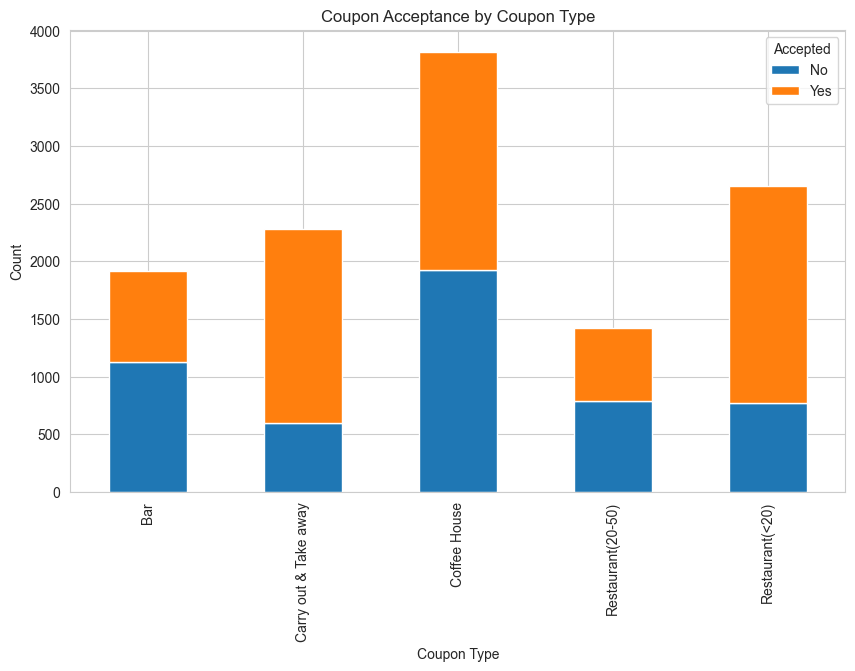

In [125]:
coupon_clounm= data_drop.groupby(['coupon', 'Y']).size().unstack()
print(coupon_clounm.head())
#
fig4=coupon_clounm.plot(kind='bar',stacked=True,figsize=(10,6))
plt.title('The acception ratio of each column')
plt.legend(title='Accepted', labels=['No', 'Yes'])
plt.title('Coupon Acceptance by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.show()


6. Use a histogram to visualize the temperature column.

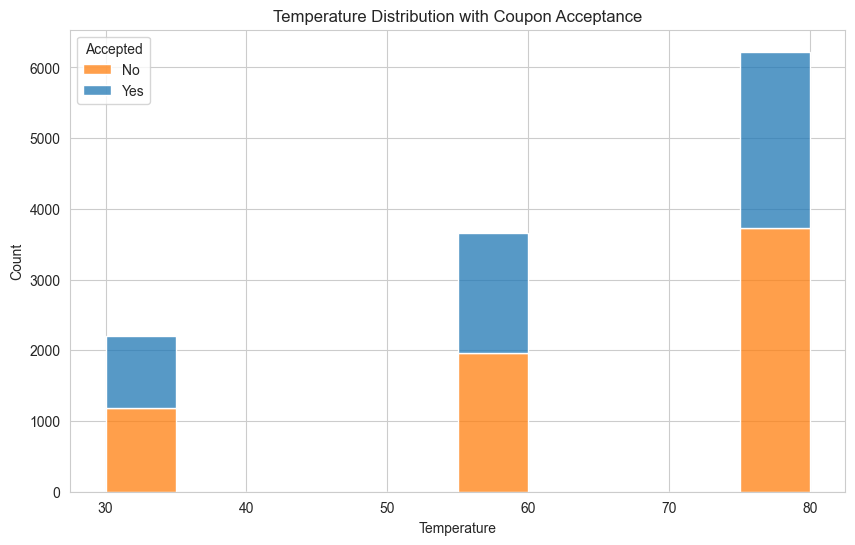

In [128]:
plt.figure(figsize=(10, 6))
sns.histplot(data_drop, x='temperature', hue='Y', bins=10,  multiple="stack")
plt.title('Temperature Distribution with Coupon Acceptance')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend(title='Accepted', labels=['No', 'Yes'])
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [152]:
Bar_=data_drop[data_drop['coupon']=='Bar']
Bar_

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [218]:
Bar_c=Bar_['Y'].mean()
print(f"The bar coupon  accepted ratio is \n:{Bar_c:.2%}")  


The bar coupon  accepted ratio is 
:41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [170]:
Bar_c_less3=Bar_[(Bar_['Bar']=='never') | (Bar_['Bar']=='1~3')|(Bar_['Bar']=='less1')]['Y'].mean()
print(f"The people who went to a bar 3 or fewer times acceptance rate is:\n{Bar_c_less3:.2%}/n")
Bar_c_more3=Bar_[(Bar_['Bar']=='gt8') | (Bar_['Bar']=='4~8')]['Y'].mean()
print(f"The people who went to a bar more than 3 times acceptance rate is:\n{Bar_c_more3:.2%}")

The people who went to a bar 3 or fewer times acceptance rate is:
37.27%/n
The people who went to a bar more than 3 times acceptance rate is:
76.17%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


the acceptance rate for driver who go to a bar more than once and over the age of 25 is:
68.28%

the acceptance rate for all other driver  is:
50.38%



Text(0.5, 1.0, 'Differnce rate betwwen age more than 25 and other')

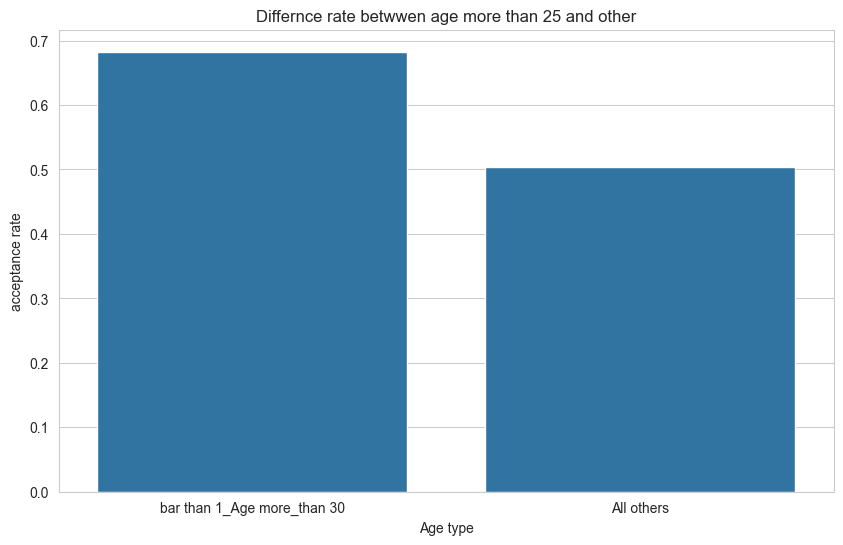

In [221]:
bar_age_more25=Bar_[(Bar_['Bar'].isin(['1~3','4~8','gt8']) )& (Bar_['age']>'25')]['Y'].mean()
print(f"the acceptance rate for driver who go to a bar more than once and over the age of 25 is:\n{bar_age_more25:.2%}\n")
bar_age_all=Bar_[Bar_['age']<'25']['Y'].mean()
print(f"the acceptance rate for all other driver  is:\n{bar_age_all:.2%}\n")

accptance_=pd.DataFrame({'Age type':['bar than 1_Age more_than 30', 'All others'],'acceptance rate':[bar_age_more25,bar_age_all]})
plt.figure(figsize=(10,6))
sns.barplot(accptance_,x='Age type',y='acceptance rate')
plt.title('Differnce rate betwwen age more than 25 and other')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [186]:
occupation_categories = Bar_['occupation'].unique()
contains=[]
for i in occupation_categories:
    if i in ['faeming','fishing','forestry']:
        continue
    else: contains.append(i)
Bar_more1_pass_not_kid=Bar_[(Bar_['Bar'].isin(['1~3','4~8','gt8']))&(Bar_['passanger'].isin(['Freind(s)','Partner','Alone']))&(Bar_['occupation'].isin(contains))]['Y'].mean()

print(f"the acceptance rate  who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry:\n{Bar_more1_pass_not_kid:.2%}\n")



the acceptance rate  who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry:
68.84%



6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [199]:
 # 1 rate for question 1
bar_more1_passnotkid_notwidowed=Bar_[(Bar_['Bar'].isin(['1~3','4~8','gt8'])&(Bar_['passanger'].isin(['Partnaer','Friend(s)']))&(Bar_['maritalStatus'].isin(['Married partner','Singl','Unmarried partner','Divorced '])))]['Y'].mean()
print(f"The accaptance rate go to bars more than once a month, had passengers that were not a kid, and were not widowed :\n{bar_more1_passnotkid_notwidowed:.2%}\n")


The accaptance rate go to bars more than once a month, had passengers that were not a kid, and were not widowed :
76.19%



In [198]:
# rate for question 2
bar_more1_age_less30=Bar_[(Bar_['Bar'].isin(['1~3','4~8','gt8']))&(Bar_['age']<'30')]['Y'].mean()
print(f"The accaptance rate go to bars more than once a month and are under the age of 30:\n{bar_more1_age_less30:.2%}\n")
                

The accaptance rate go to bars more than once a month and are under the age of 30:
72.96%



In [203]:
# rate for question 3
To_restorant_more4_imcom_less50k=data_drop[(data_drop['income'].isin(['$25000 - $37499','$12500 - $24999','$37500 - $49999 ']))&(data_drop['RestaurantLessThan20'].isin(['4~8','gt8',]))]['Y'].mean()
print(f"The accaptance rate go to cheap restaurants more than 4 times a month and income is less than 50K:\n{To_restorant_more4_imcom_less50k:.2%}\n")


The accaptance rate go to cheap restaurants more than 4 times a month and income is less than 50K:
57.49%



Text(0.5, 1.0, 'Differnce rate betwwen type')

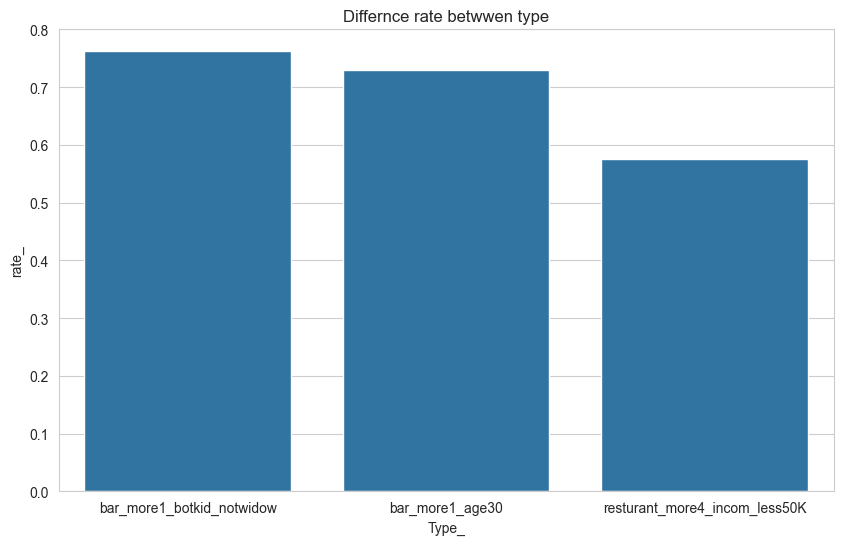

In [222]:
compar_=pd.DataFrame({'Type_':['bar_more1_botkid_notwidow','bar_more1_age30','resturant_more4_incom_less50K'],'rate_':[bar_more1_passnotkid_notwidowed,bar_more1_age_less30,To_restorant_more4_imcom_less50k]})

plt.figure(figsize=(10,6))
sns.barplot(compar_,x='Type_',y='rate_')
plt.title('Differnce rate betwwen type')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
"""
1.The people who went to a bar more than 3 times acceptance rate is:76.17%
2.The accaptance rate go to bars more than once a month, had passengers that were not a kid, and were not widowed :76.19%
3.The accaptance rate go to bars more than once a month and are under the age of 30:72.96%

My hypothesize is below:
the people who offen goes to bar and young ,and his/her passanger not a kid may more likely accepted the bar coupons.

"""

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### 8.The acceptance rate for destination not work,and age more than 30, maritalStatus is singal.


In [208]:
single_age_morethan30_work=Bar_[(Bar_['maritalStatus']=='Single')&(Bar_['age']>'30')&(Bar_['destination']=='Work')]['Y'].mean()
print(f"The acceptance rate for destination is work,and age more than 30, maritalStatus is singal:\n{single_age_morethan30_work:.2%}\n")

The acceptance rate for destination not work,and age more than 30, maritalStatus is singal:
36.49%



In [209]:
single_age_morethan30_NoUrgentPlace=Bar_[(Bar_['maritalStatus']=='Single')&(Bar_['age']>'30')&(Bar_['destination']=='No Urgent Place')]['Y'].mean()
print(f"The acceptance rate for destination is No Urgent Place,and age more than 30, maritalStatus is singal:\n{single_age_morethan30_NoUrgentPlace:.2%}\n")

The acceptance rate for destination not work,and age more than 30, maritalStatus is singal:
47.97%



In [212]:
single_age_morethan30_home=Bar_[(Bar_['maritalStatus']=='Single')&(Bar_['age']>'30')&(Bar_['destination']=='Home')]['Y'].mean()
print(f"The acceptance rate for destination is home,and age more than 30, maritalStatus is singal:\n{single_age_morethan30_home:.2%}\n")

The acceptance rate for destination is home,and age more than 30, maritalStatus is singal:
45.23%



In [ ]:
# I find that in the same conditions, people who's destination is work,may not liky to accept the coupon.

### 9.discuss the maritalStatus for people who more liky accep the bar coupon

<Axes: xlabel='maritalStatus', ylabel='Count'>

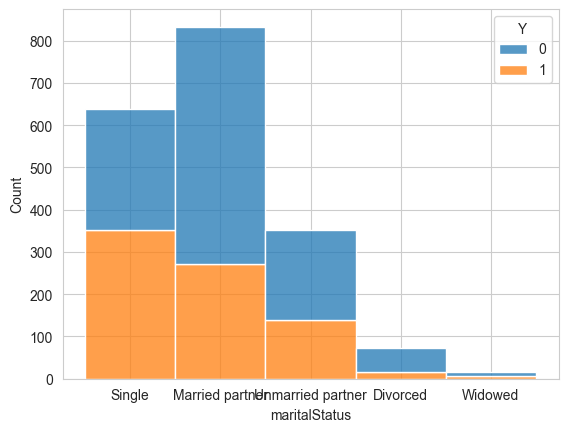

In [216]:
sns.histplot(Bar_, x='maritalStatus', hue='Y', bins=10,  multiple="stack")

In [ ]:
# In the picture we can find that maritalStatus is single more likely accept the bar coupon,and other status ,especially for Divoreced may more like reject the coupon.